In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import TimeSeriesSplit, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest.csv').set_index('Unnamed: 0')

In [3]:
#tscv = TimeSeriesSplit(n_splits=5)
tscv = KFold(n_splits=5)
params = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth': [2,5,10,15,20], 'max_leaf_nodes': [2,5,10,15,20], 'min_samples_split': [2, 4, 6, 8, 10]} # 'random_state': [10, 20, 30, 40, 50]
dec_tree = DecisionTreeClassifier()
grid_search_cv = GridSearchCV(dec_tree, params, cv=tscv)

In [4]:
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_samples_split': 6,
 'splitter': 'best'}

In [5]:
dec_tree_parms = dec_tree.set_params(**grid_search_cv.best_params_)
dec_tree_parms

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=20,
                       min_samples_split=6)

In [6]:
dec_tree_parms.fit(X_train,y_train)
pred = dec_tree_parms.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.4479023648927812, recall: 0.22556390977443608, f1score: 0.22796386902851107


/Users/kidukkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


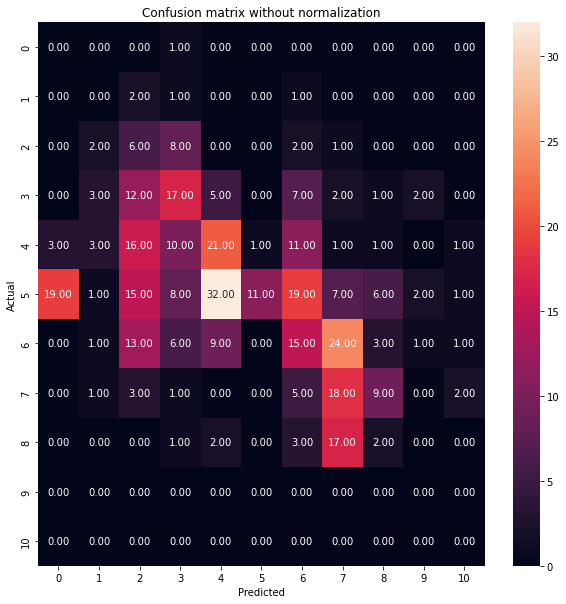

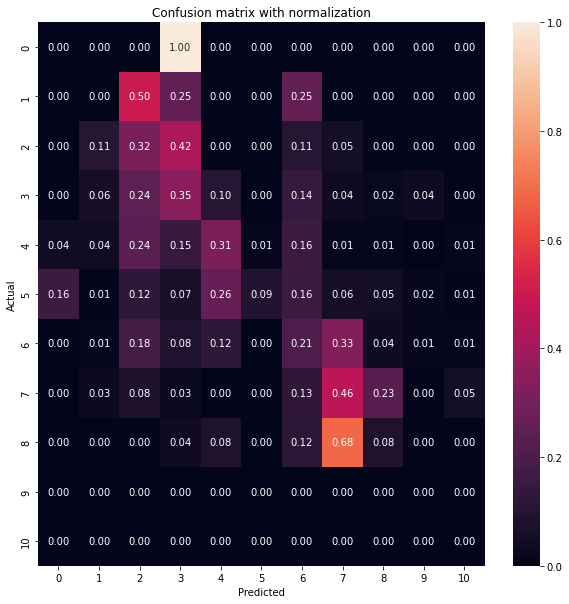

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

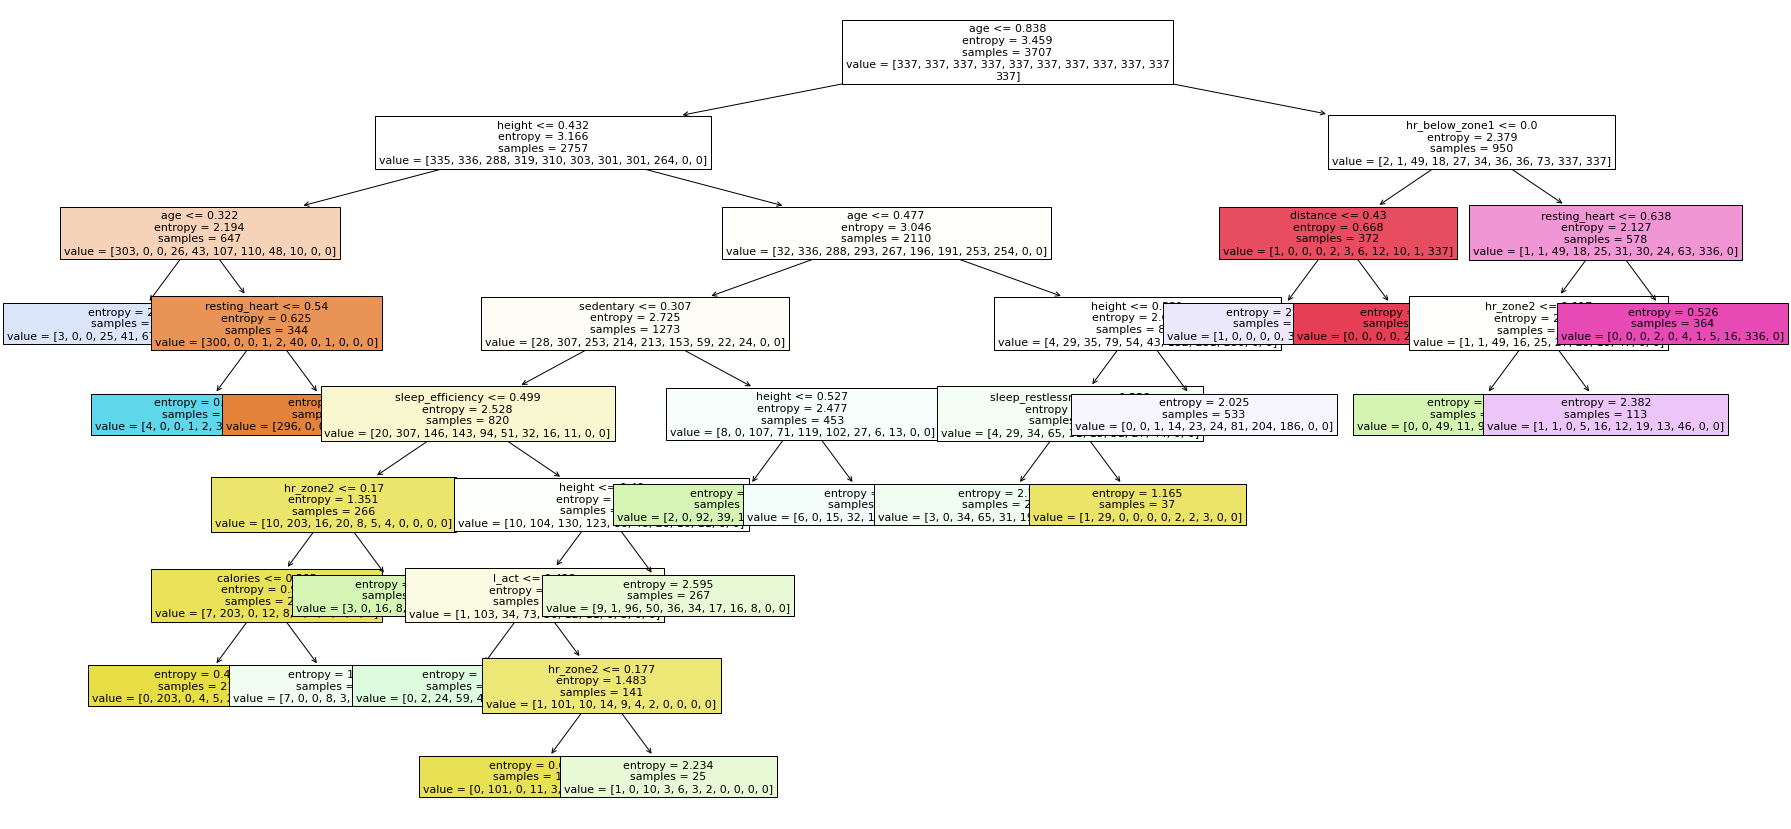

In [15]:
from sklearn import tree

plt.figure(figsize=(30,15))

tree.plot_tree(dec_tree,
              feature_names=X_train.columns,
              filled=True,
              fontsize=11)
plt.show()

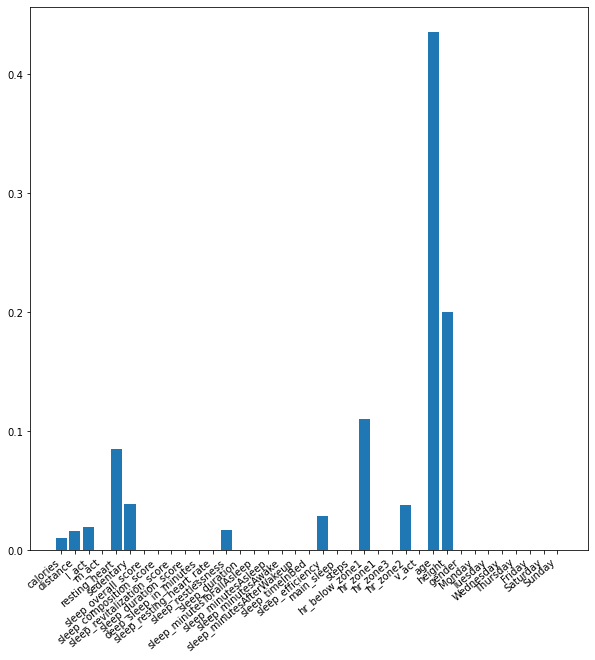

In [11]:
importance = dec_tree.feature_importances_

fig = plt.figure(figsize=(10,10))
plt.bar(X_test.columns, importance)
plt.xticks(rotation=40, ha = 'right')
plt.show()